# Parmigiano Parsing | Level of difficulty : 2 out of 10

In [50]:
from bs4 import BeautifulSoup
from random import choice
from fake_useragent import UserAgent

from selenium import webdriver
import csv
import time
import os
import wget
import requests

print("Modules loaded successfully")

Modules loaded successfully


### Variables

In [51]:
main_url = "http://parmigiano-group.com/restaurants"

### Functions

In [97]:
def get_proxy():
    proxies = []
    proxyFile = open("../proxies.content.txt", "r")
    soup = BeautifulSoup(proxyFile.read(), 'html.parser')
    tr = soup.findAll('td', attrs={'class': 'tdl'})
    for td in tr:
        proxies.append(td.text)
        proxyFile.close()
    return {'http//': choice(proxies)}

def get_user_agent():
    return { 'User-Agent': UserAgent().chrome }

def get_links(html):
    links = []
    try:
        links = html.findAll('a', attrs={'class':'restoran-block'})
        links = [link["href"] for link in links]
    except:
        print("Error")
    return links

def get_data(url):
    driver.get(url)
    time.sleep(10)
    eng = driver.find_element_by_xpath('//*[@id="wrap"]/header/div/div[1]/div/div/div[1]/div/a[2]')
    eng.click()
    time.sleep(10)
    
    title = driver.find_element_by_xpath('//*[@id="wrap"]/main/div[1]/div/h1').text
    youtube = driver.find_element_by_xpath('//*[@id="wrap"]/main/div[2]/div/div[2]/div/div[3]/div/ul/li[1]/a').get_attribute("href")
    facebook = driver.find_element_by_xpath('//*[@id="wrap"]/main/div[2]/div/div[2]/div/div[3]/div/ul/li[2]/a').get_attribute("href")
    instagram = driver.find_element_by_xpath('//*[@id="wrap"]/main/div[2]/div/div[2]/div/div[3]/div/ul/li[3]/a').get_attribute("href")
    avg_receipt = get_element('//*[@id="wrap"]/main/div[3]/div/div/div[1]/ul/li[1]/div', mode=0)
    kitchen = get_element('//*[@id="wrap"]/main/div[3]/div/div/div[1]/ul/li[2]/div', mode=0)
    seats = get_element('//*[@id="wrap"]/main/div[3]/div/div/div[1]/ul/li[3]/div', mode=0)
    vip = get_element('//*[@id="wrap"]/main/div[3]/div/div/div[2]/ul/li[1]/div', mode=0)
    work_hours = get_element('//*[@id="wrap"]/main/div[3]/div/div/div[2]/ul/li[2]/div', mode=0)
    menu_pdf = get_element('//*[@id="myModal311"]/div/div/div[2]/iframe', mode=2)
    bar_pdf = get_element('//*[@id="myModal314"]/div/div/div[2]/iframe', mode=2)
    tel, address = get_contacts("div.col-md-8 a")
    album = get_album('div.owl-item img')
    about_us = get_about_us('div.desc p')
    
    return {
        "title" : title, # text
        "tel" : tel, # text
        "address" : address, # list
        "youtube" : youtube, # href
        "facebook" : facebook, # href
        "instagram" : instagram, # href
        "avg_receipt" : avg_receipt, # text
        "kitchen" : kitchen, # text
        "seats" : seats, # text
        "vip" : vip, # text
        "work_hours" : work_hours, # text
        "menu_pdf" : menu_pdf, # href
        "bar_pdf" : bar_pdf, # href
        "album" : album # list
    }

def get_element(xpath, mode):
    try:
        if mode == 0:
            return driver.find_element_by_xpath(xpath).text
        elif mode == 1:
            return driver.find_element_by_xpath(xpath).get_attribute("href")
        elif mode == 2:
            return driver.find_element_by_xpath(xpath).get_attribute("src")
        return None
    except:
        return None
        
    
def get_contacts(css_selector):
    contacts = driver.find_elements_by_css_selector(css_selector)
    tel = None
    address = None
    if len(contacts) > 0:
        tel = contacts[0].text
        if len(contacts) > 1:
            address = []
            contacts.pop(0)
            for point in contacts:
                address.append(point.text)
    return tel, address

def get_album(css_selector):
    album = []
    images = driver.find_elements_by_css_selector(css_selector)
    for img in images:
        album.append(img.get_attribute("src"))
    return album

def get_about_us(css_selector):
    about_us = ""
    _text = driver.find_elements_by_css_selector(css_selector)
    for par in _text:
        about_us += par.text
    return about_us

### Get all links from main url

In [19]:
with open("links.txt", "w") as file:
    response = requests.get(url=main_url, headers=get_user_agent(), proxies=get_proxy())
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')
    for link in get_links(soup):
        file.write("http://parmigiano-group.com" + link + "\n")

### Get data from links (data.csv, address.csv, album.csv)

In [99]:
driver = webdriver.Chrome()
main_fn = [
    "title", "tel", "youtube", "facebook", "instagram", 
     "avg_receipt", "kitchen", "seats", "vip", "work_hours", "menu_pdf", 
     "bar_pdf"
]
address_fn = ["address", "res_id"]
album_fn = ["image_src", "res_id"]

csv_file_main = open('data.csv', 'w', newline='', encoding='utf-8')
csv_file_address = open('address.csv', 'w', newline='', encoding='utf-8')
csv_file_album = open('album.csv', 'w', newline='', encoding='utf-8')

main_writer = csv.DictWriter(csv_file_main, fieldnames=main_fn)
main_writer.writeheader()

address_writer = csv.DictWriter(csv_file_address, fieldnames=address_fn)
address_writer.writeheader()

album_writer = csv.DictWriter(csv_file_album, fieldnames=album_fn)
album_writer.writeheader()

id = 1

with open("links.txt", "r") as file:
    for url in file.readlines():
        dt = get_data(url)
        main_writer.writerow({
            main_fn[0] : dt["title"], main_fn[1] : dt["tel"], main_fn[2] : dt["youtube"],
            main_fn[3] : dt["facebook"], main_fn[4] : dt["instagram"], main_fn[5] : dt["avg_receipt"],
            main_fn[6] : dt["kitchen"], main_fn[7] : dt["seats"], main_fn[8] : dt["vip"],
            main_fn[9] : dt["work_hours"], main_fn[10] : dt["menu_pdf"], main_fn[11] : dt["bar_pdf"]
        })
        
        if dt["address"] is not None:
            for address in dt["address"]:
                address_writer.writerow({
                    address_fn[0] : address, address_fn[1] : id
                })
        
        if dt["album"] is not None:
            for image in dt["album"]:
                album_writer.writerow({
                    album_fn[0] : image, album_fn[1] : id
                })
        
        id+=1
            
csv_file_main.close()
csv_file_address.close()
csv_file_album.close()
driver.close()

In [182]:
import psycopg2

conn = psycopg2.connect(dbname='dfcc0edulbldv3', user='phjhbpbcuveeql', 
                        password='57a7d6277d9dc0a8750877f6ba352b0021c8b12a8fb60e6747f7808c11c9f77f', host='ec2-54-197-232-203.compute-1.amazonaws.com')

f = open("data.csv", encoding="utf-8")
reader = csv.reader(f)
tmp = False
id = 0
with conn.cursor() as cursor:
    for title,tel,youtube,facebook,instagram,avg_receipt,kitchen,seats,vip,work_hours,menu_pdf,bar_pdf in reader:
        id+=1
        if tmp is False:
            tmp = True
            continue
        if "Number of seats" in kitchen in kitchen:
            continue
        if seats == "" in seats:
            continue
        if "Working hours" in vip:
            continue
        try:
            conn.autocommit = True  
            sql = f"INSERT INTO restaurants(id, title, phone, youtube, facebook, instagram, avg_receipt, kitchen, seats, vip, work_hours) VALUES ({id}, '{title}', '{tel}', '{youtube}', '{facebook}', '{instagram}', '{avg_receipt}', '{kitchen}', '{seats}', '{vip}', '{work_hours}');"
            record_to_insert = (id,title,tel,youtube,facebook,instagram,avg_receipt,kitchen,seats,vip,work_hours,menu_pdf,bar_pdf)
            cursor.execute(sql, record_to_insert)
            print(f"SUCCESS:{id}")
        except Exception as e:
            print(f"Fail: {e}")
f.close()

SUCCESS:2
SUCCESS:4
SUCCESS:6
SUCCESS:7
SUCCESS:8
SUCCESS:9
SUCCESS:10
SUCCESS:12
SUCCESS:13
SUCCESS:15
SUCCESS:17
SUCCESS:18
SUCCESS:20
SUCCESS:21
SUCCESS:22
SUCCESS:24


In [203]:
f = open("address.csv", encoding="utf-8")
reader = csv.reader(f)
tmp = False
id = 0

for address, res_id in reader:
    id+=1
    if tmp is False:
        tmp = True
        continue
    if "+" in address:
        continue
    if res_id in ids:
        continue
    with conn.cursor() as cursor:
        conn.autocommit = True  
        sql = f"INSERT INTO restaurant_address(address, restaurant_id) VALUES ('{address}',{res_id});"
        cursor.execute(sql)
        print(f"SUCCESS:{id}")
f.close()

SUCCESS:3
SUCCESS:5
SUCCESS:6
SUCCESS:7
SUCCESS:9
SUCCESS:11
SUCCESS:12
SUCCESS:13
SUCCESS:14
SUCCESS:15
SUCCESS:16
SUCCESS:17
SUCCESS:18
SUCCESS:19
SUCCESS:20
SUCCESS:21
SUCCESS:22
SUCCESS:23
SUCCESS:24
SUCCESS:26
SUCCESS:28
SUCCESS:29
SUCCESS:31
SUCCESS:32
SUCCESS:33
SUCCESS:35
SUCCESS:36
SUCCESS:38
SUCCESS:39


In [204]:
f = open("album.csv", encoding="utf-8")
reader = csv.reader(f)
tmp = False
id = 0

for image_src, res_id in reader:
    id+=1
    if tmp is False:
        tmp = True
        continue
    if res_id in ids:
        continue
    try:
        with conn.cursor() as cursor:
            conn.autocommit = True  
            sql = f"INSERT INTO restaurant_album(src, restaurant_id) VALUES ('{image_src}',{res_id});"
            cursor.execute(sql)
            print(f"SUCCESS:{id}")
    except Exception as e:
        print(f"Fail: {e}")
f.close()

SUCCESS:2
SUCCESS:3
SUCCESS:4
SUCCESS:5
SUCCESS:6
SUCCESS:7
SUCCESS:8
SUCCESS:9
SUCCESS:10
SUCCESS:11
SUCCESS:12
SUCCESS:13
SUCCESS:14
SUCCESS:15
SUCCESS:16
SUCCESS:17
SUCCESS:18
SUCCESS:19
SUCCESS:20
SUCCESS:21
SUCCESS:22
SUCCESS:23
SUCCESS:24
SUCCESS:25
SUCCESS:26
SUCCESS:27
SUCCESS:28
SUCCESS:29
SUCCESS:30
SUCCESS:31
SUCCESS:32
SUCCESS:33
SUCCESS:34
SUCCESS:35
SUCCESS:36
SUCCESS:37
SUCCESS:38
SUCCESS:39
SUCCESS:40
SUCCESS:41
SUCCESS:42
SUCCESS:43
SUCCESS:44
SUCCESS:45
SUCCESS:46
SUCCESS:47
SUCCESS:48
SUCCESS:49
SUCCESS:50
SUCCESS:51
SUCCESS:52
SUCCESS:53
SUCCESS:54
SUCCESS:55
SUCCESS:56
SUCCESS:57
SUCCESS:58
SUCCESS:59
SUCCESS:60
SUCCESS:61
SUCCESS:62
SUCCESS:63
SUCCESS:64
SUCCESS:65
SUCCESS:66
SUCCESS:67
SUCCESS:68
SUCCESS:69
SUCCESS:70
SUCCESS:71
SUCCESS:72
SUCCESS:73
SUCCESS:74
SUCCESS:75
SUCCESS:76
SUCCESS:77
SUCCESS:78
SUCCESS:79
SUCCESS:80
SUCCESS:81
SUCCESS:82
SUCCESS:83
SUCCESS:84
SUCCESS:85
SUCCESS:86
SUCCESS:87
SUCCESS:88
SUCCESS:89
SUCCESS:90
SUCCESS:91
SUCCESS:92
SUCCESS

In [244]:
driver = webdriver.Chrome()
driver.get('https://sxodim.com/almaty/places/countryside/')

In [251]:
more = driver.find_element_by_xpath('//*[@id="load_more"]/span')
more.click()

ElementClickInterceptedException: Message: element click intercepted: Element <span>...</span> is not clickable at point (472, 190). Other element would receive the click: <div class="descr">...</div>
  (Session info: chrome=77.0.3865.90)


In [252]:
jk = []
news_list = driver.find_elements_by_css_selector('div.news_list a')
for news in news_list:
    if "sxodim" in news.get_attribute("href") in news.get_attribute("href"):
        jk.append(news.get_attribute("href"))

jk = list(dict.fromkeys(jk))
for jkk in jk:
    print(jkk)

https://sxodim.com/almaty/place/gosudarstvennyj-muzej-iskusstv-im-a-kasteeva/
https://sxodim.com/almaty/place/bolshaya-stsena-teatra-artishok/
https://sxodim.com/almaty/place/tsentralnyj-park-kultury-i-otdyha-imeni/
https://sxodim.com/almaty/place/kazahskij-gosudarstvennyj-akademicheskij-teatr-opery-i-baleta-imeni-abaya/
https://sxodim.com/almaty/place/zona-otdyha-udacha/
https://sxodim.com/almaty/place/rybalka-i-otdyh-v-kyzyl-tu/
https://sxodim.com/almaty/place/strelkovyj-klub-im-a-asanova/
https://sxodim.com/almaty/place/home-club/
https://sxodim.com/almaty/place/tsentr-semejnogo-otdyha-home-club/
https://sxodim.com/almaty/place/vysokogornyj-kurort-ak-bulak/
https://sxodim.com/almaty/place/gornolyzhnyj-otel-rekyavik/
https://sxodim.com/almaty/place/altyn-tas/
https://sxodim.com/almaty/place/etno-auyl-gunny/
https://sxodim.com/almaty/place/hygge-home-almaty/
https://sxodim.com/almaty/place/kompleks-tau-dastarhan/
https://sxodim.com/almaty/place/fazenda-u-mihalycha/
https://sxodim.com/

In [224]:
driver.get('https://sxodim.com/almaty/place/tsentralnyj-park-kultury-i-otdyha-imeni/')

In [ ]:
id = 1
for url in jk:
    driver.get(url)
    time.sleep(5)

    title = driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[2]/div[1]/div[1]/div[1]/p')
    title = title.text

    description = ""
    pars = driver.find_elements_by_css_selector('div.default_content p')
    for par in pars:
        description += par.text
    print(description)

    rate = driver.find_element_by_xpath('//*[@id="rating"]/div')
    rate = int(float(rate.text))

    address = None
    work_hours = None
    contacts = None
    metro = None
    site = None

    table = driver.find_elements_by_css_selector('div.info_table tbody td')
    for td in table:
        tt = td.text.split("\n")
        theme = tt[0].replace(":", "")
        if theme == 'Адрес':
            address = tt[1]
        elif theme == 'Часы работы':
            work_hours = tt[1]
        elif theme == 'Контакты':
            contacts = tt[1]
        elif theme == 'Ближайшее метро':
            metro = tt[1]
        elif theme == 'Сайт':
            site = "https://" + tt[1]
    print(address)
    print(work_hours)
    print(contacts)
    print(metro)
    print(site)
    
    with conn.cursor() as cursor:
        conn.autocommit = True  
        sql = f"INSERT INTO countrysides(id, title, description, rate, address, work_hours, contacts, metro, site) VALUES ({id}, '{title}', '{description}', '{rate}', '{address}', '{work_hours}', '{contacts}', '{metro}', '{site}');"
        cursor.execute(sql)
        print(f"SUCCESS:{id}")
    
    time.sleep(5)
    id+=1

In [ ]:
    # 7 - accident time ?
    # 8 - road
    # 9 - daylight ?
    # 10 - что-то включено
    # 11 - что-то с перекрестком
    # 12 - что-то отсутствует
    # 13 - штраф
    # 14 - виновный
    # 15 - трезвый или пьяный
    # 16 - ?
    # 17 - ?
    # 18 - accident date ?
    # 19 - ?
    # 20 - region
    # 21 - ?
    # 22 - vehicle category
    # 23 - public transport - 1, not public transport - 0
    # 24 - ?
    # 25 - ?
    # 26 - ?
    # 27 - ?
    # 28 - ?
    # ...
    # 43 - geom ?

In [124]:
import numpy as np
import csv

f = open("hackathon/pravstat._accidents_.csv", encoding="utf-8")
reader = csv.reader(f, delimiter = ';', lineterminator = '\n')
accident_time = np.array([])
road = np.array([])
penalty = np.array([])
guilty = np.array([])
is_drunk = np.array([])
region = np.array([])
veh_categ = np.array([])
is_pub_trans = np.array([])

tmp = False
id = 0
for row in reader:
    if tmp is False:
        tmp = True
        continue
    accident_time = np.append(accident_time, row[7])
    road = np.append(road, row[8])
    penalty = np.append(penalty, row[13])
    guilty = np.append(guilty, row[14])
    is_drunk = np.append(is_drunk, row[15])
    region = np.append(region, row[20])
    veh_categ = np.append(veh_categ, row[22])
    is_pub_trans = np.append(is_pub_trans, row[23])
    id+=1
    if id == 2000:
        break

Аварии по времени в Жетысуский р-н.


Text(0.5, 0, 'times')

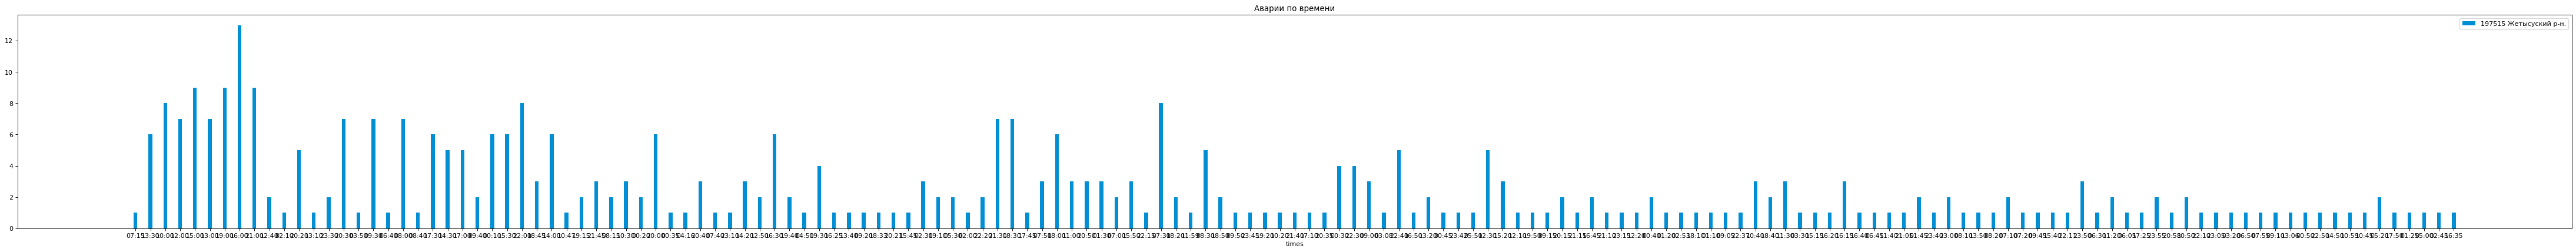

In [77]:
import matplotlib.pyplot as plt

data = {}

for i in range(len(region)):
    try:
        data[region[i]].append(accident_time[i])
    except:
        data[region[i]] = []

# data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

# print(names)
# print(values)

name = names[0]

data = {}

for val in values[0]:
    try:
        data[val] += 1
    except:
        data[val] = 1

ages = list(data.keys())
x_indexes = np.arange(len(ages))
width = 0.25
values = list(data.values())

plt.figure(num=None, figsize=(70, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(ages, values, width=width, color='#008fd5', label=name)

print("Аварии по времени в Жетысуский р-н.")
plt.legend()
plt.title("Аварии по времени")
plt.xlabel("times")

{'197515 Жетысуский р-н.': 247, '197511 Алмалинский р-н.': 235, '197519 Турксибский р-н.': 193, '197513 Ауэзовский р-н.': 251, '197514 Бостандыкский р-н.': 222, '197517 Медеуский р-н.': 182, '197512 Алатауский район': 214, '191952 Карасайский район': 1}
247
235
193
251
222
182
214
1
['Жетыс. р-н.', 'Алмал. р-н.', 'Туркс. р-н.', 'Ауэзо. р-н.', 'Боста. р-н.', 'Медеу. р-н.', 'Алата. р-н.', 'Карас. р-н.']


Text(0.5, 1.0, 'ДТП водителей в трезвом состоянии')

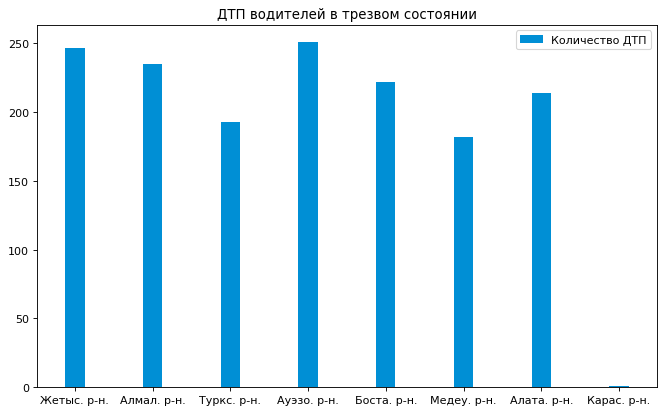

In [125]:
import matplotlib.pyplot as plt

data = {}

for i in range(len(region)):
    try:
        if(is_drunk[i] != 'алкогольное опьянение' and is_drunk[i] != ''):
            data[region[i]] += 1
    except:
        data[region[i]] = 1

names = list(data.keys())
values = list(data.values())

print(data)

new_names = []

for name in names:
    new_names.append(name[7:12] + ". р-н.")

new_values = []
sum_all = 0
for val in values:
    sum_all += val
for val in values:
    print(val)
    new_values.append(str(round((val*100/sum_all),2))+"%")
    
print(new_names)

    
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(new_names, values, width=width, color='#008fd5', label="Количество ДТП")

plt.legend()
plt.title("ДТП водителей в трезвом состоянии")

{'197512 Алатауский район': 25, '197519 Турксибский р-н.': 20, '197511 Алмалинский р-н.': 32, '197514 Бостандыкский р-н.': 31, '197515 Жетысуский р-н.': 25, '197513 Ауэзовский р-н.': 27, '197517 Медеуский р-н.': 19}


Text(0.5, 1.0, 'ДТП водителей общественного транспорта')

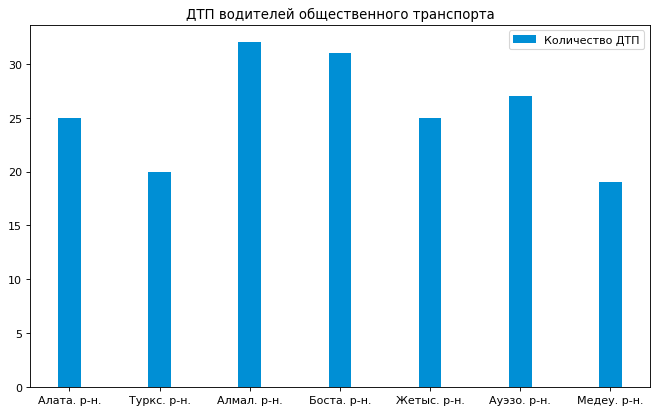

In [131]:
import matplotlib.pyplot as plt

data = {}

for i in range(len(region)):
    try:
        if(is_pub_trans[i] == '1'):
            data[region[i]] += 1
    except:
        data[region[i]] = 1

names = list(data.keys())
values = list(data.values())

print(data)

new_names = []

for name in names:
    new_names.append(name[7:12] + ". р-н.")

# new_values = []
# sum_all = 0
# for val in values:
#     sum_all += val
# for val in values:
#     print(val)
#     new_values.append(str(round((val*100/sum_all),2))+"%")
    
# print(new_names)

    
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(new_names, values, width=width, color='#008fd5', label="Количество ДТП")

plt.legend()
plt.title("ДТП водителей общественного транспорта")

In [347]:
driver.get('https://citybus.kz/')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=77.0.3865.90)


In [348]:
driver = webdriver.Chrome()
driver.get('https://citybus.kz/')

In [357]:
a = driver.find_element_by_xpath('//*[@id="ui-accordion-objectsPanel-header-0"]/a')
a.click()

None
